---  
  
# A. Introduction  


Author: Nicku R. Perdana  
  
This program will work on the development of a computer vision deep learning system to classify fruits based on sample images provided from this [link](https://www.kaggle.com/datasets/utkarshsaxenadn/fruits-classification). You will be redirected to a Kaggle public dataset, which serves as a resource for this modeling endeavor.

The objective of this project is to achieve practical image classification of fruits using only their images. The model aims to serve as a valuable tool for conducting deep neural network classification using Computer Vision and Convolutional Neural Network modeling techniques.  
  
Final touch: Visit this model deployment on my Hugging Face Space via this [hyperlink](https://huggingface.co/spaces/nickuperdana/fruit_classification_using_computer_vision).

---

# B. Libraries Importing

In [1]:
# working with data preprocessing
import numpy as np

# working with data visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# working with deep learning method
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import plot_model

# working with data inference
import cv2

Notes:  
- This notebook will utilize TensorFlow version 2.15.0, which is compatible with a laptop equipped with an Intel 12th-gen i5 CPU and Iris Xe GPU.
- Therefore, we anticipate a substantial training duration and algorithm configuration to accommodate reliable modeling with the available resources.

# C. Data Loading

In [2]:
imgSize = 400
batchSize = 20
train_path = 'FruitClassification/train/'
valid_path = 'FruitClassification/valid/'
test_path = 'FruitClassification/test/'

- First, we need to establish a uniform image size configuration for our training, described with the `imgSize` variable.
- Additionally, we must set the batch size for our training purposes. The batch size determines the number of samples in each batch of the dataset.
- Furthermore, we need to specify the location of our training and testing data in the path. Please note that my repository does not include the files, as I have placed them in the `.gitignore` file due to size constraints on commits. To address this, you will need to download them manually via the provided Kaggle link, create a folder named `FruitClassification`, and extract the `train` and `valid` folders there.

## C1. Training Set Data Loading

In [3]:
# defining the training set
print('Train-set:')
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
train_data = train_data_gen.flow_from_directory(train_path, (imgSize, imgSize),
                                    batch_size=batchSize, class_mode='categorical',
                                    shuffle=False)

Train-set:


Found 9700 images belonging to 5 classes.


In [4]:
print(f'List of label classification: \n{train_data.class_indices}')
print(f'\nNumber of batches in train-set: {len(train_data)}')

List of label classification: 
{'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4}

Number of batches in train-set: 485


Based on this step, we determined that our training dataset will be divided into 485 batches to meet the requirement of 20 images per batch.

Our classification will adhere to the preset labels as follows:
- 0 -> Apple
- 1 -> Banana
- 2 -> Grape
- 3 -> Mango
- 4 -> Strawberry  
  
To simplify our modeling flow, I've configured the scaling method within the ImageDataGeneration function to scale the values from [0, 255] to [0, 1]. Therefore, we have partially completed the feature engineering with this step. 

## C2. Validation Set Data loading

In [5]:
# defining the Validation set
print('Validation set:')
valid_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
valid_data = valid_data_gen.flow_from_directory(valid_path, (imgSize, imgSize),
                                    batch_size=batchSize, class_mode='categorical',
                                    shuffle=False)

Validation set:
Found 200 images belonging to 5 classes.


In [6]:
print(f'List of label classification: \n{valid_data.class_indices}')
print(f'\nNumber of batches in valid-set: {len(valid_data)}')

List of label classification: 
{'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4}

Number of batches in valid-set: 10


The number of batches in our validation set satisfies our configuration, as we set the batch size to be equal to 20 beforehand.

Our classification will adhere to the preset labels below:
- 0 -> Apple
- 1 -> Banana
- 2 -> Grape
- 3 -> Mango
- 4 -> Strawberry

We also performed feature scaling on this validation set by implementing a method to rescale the values from [0, 255] to [0, 1].

## C3. Testing Set Data loading

In [7]:
# defining the Testing set
print('Testing set:')
test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
test_data = test_data_gen.flow_from_directory(test_path, (imgSize, imgSize),
                                    batch_size=batchSize, class_mode='categorical',
                                    shuffle=False)

Testing set:
Found 100 images belonging to 5 classes.


For our purpose to test our model with a testing set, we have imported collection of images that we will uses to evaluate the model. The number of batches in our test-set satisfies our configuration, as we set the batch size to be equal to 20 beforehand.

We also performed feature scaling on this validation set by implementing a method to rescale the values from [0, 255] to [0, 1].

# D. Exploratory Data Analysis  
  
In this section, we will explore our dataset in its natural form. Typically, computer vision model EDA relies on basic observation and image recognition activities. Hence, this process will involve visualizing randomly selected images.

In [8]:
def class_naming(list_classifier):
    '''
    This function works on returning class name using a conditional statement of an input array
    INPUT: Array of class
    OUTPUT: Class name
    '''
    list_class = ['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']
    for i in range(len(list_classifier)):
        if list_classifier[i] == 1:
            return list_class[i]
        else:
            pass
        
def eda_original_img(dataset):
    '''
    This function works on returning a randomized images of each batch of an input dataset.
    INPUT: Input dataset
    OUTPUT: A collection of randomized images'''
    title_dataset = ''
    if dataset == train_data:
        title_dataset = 'Training Dataset'
    elif dataset == valid_data:
        title_dataset = 'Validation Dataset'
    print(f'Sample Images from {title_dataset}')
    fig, ax = plt.subplots(nrows=2,ncols=8,figsize=(25,6))
    for i in range(2):
        for j in range(8):
            img, label = dataset.next()
            indexer = np.random.randint(0,len(img), 1)
            ax[i][j].imshow(img[indexer[0]])
            ax[i][j].set_title(class_naming(label[indexer[0]]))

Our function to create a simple-randomized image presenter is done and is ready to use.

Sample Images from Training Dataset


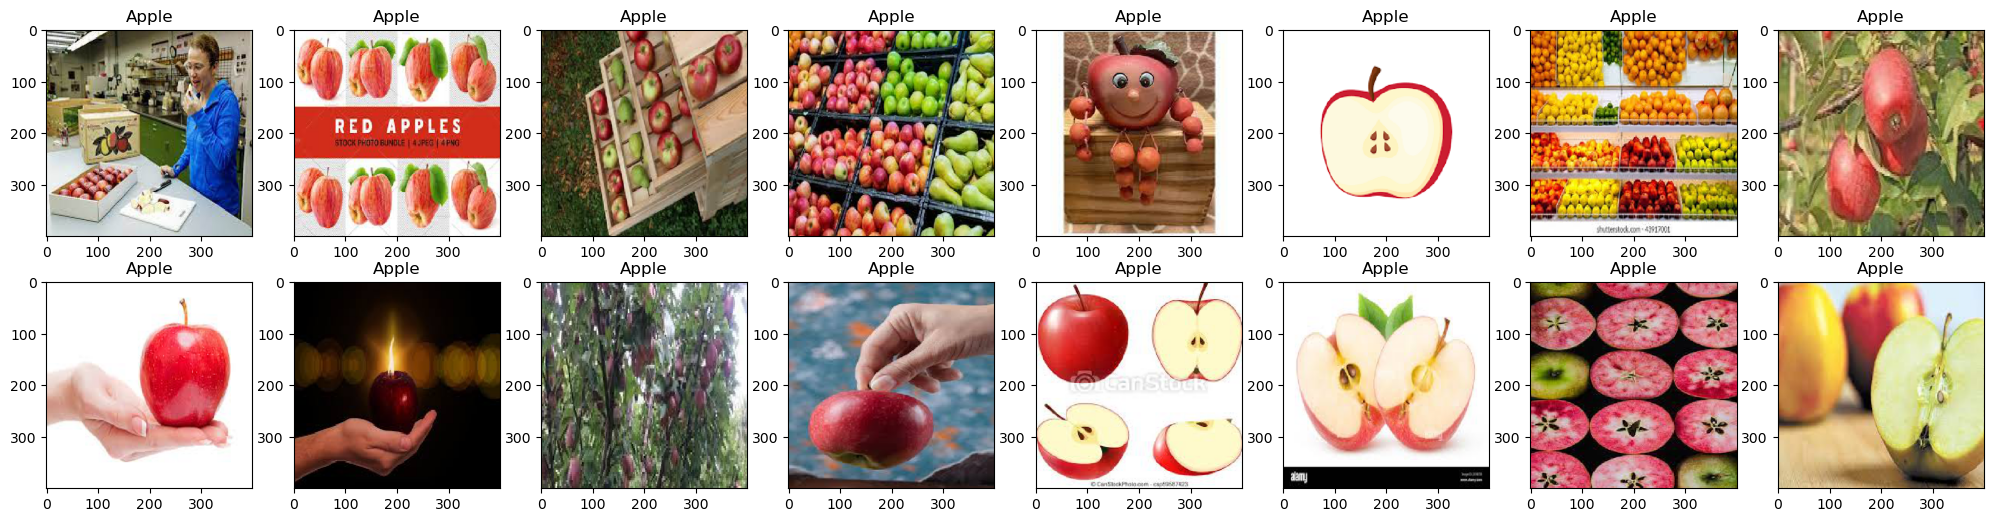

In [9]:
# visualize some sampled training images
eda_original_img(train_data)

- Some visualized images show concrete and straightforward visualizations.
- We also found several images featuring more than one homogeneous object related to their main class.
- There are also images that show class objects in a collective way, with more than one object filling the background.
- Additionally, we found some images that appear out of context, such as those with excessive zoom-out.
  
*Notes: Due to the function's randomness, the insights given may or may not be directly related to the presented output above in every rerun. The provided insights were based on multiple reruns to achieve a more general characteristic of the image sampling visualization output.

Sample Images from Validation Dataset


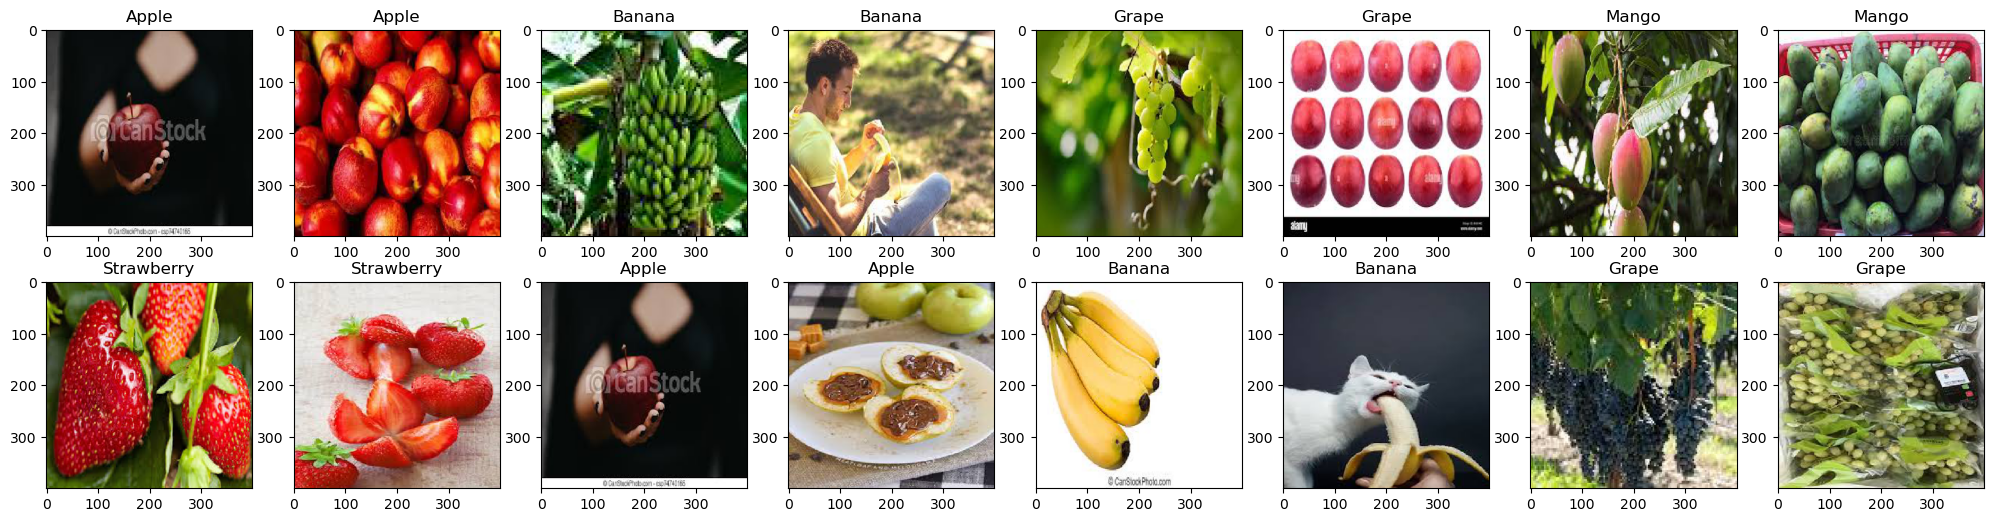

In [10]:
# visualize some sampled validation images
eda_original_img(valid_data)

- Some images appear with straightforward contexts, featuring only one or paired relevant classes.
- Some images show more than one object belonging to the same class.
- Additionally, we found images that depict more generalized objects related to their main class but still connected to the primary category.

*Notes: Due to the function's randomness, the insights provided may or may not directly relate to the presented output above in every rerun. The insights were based on multiple reruns to capture a more general characteristic of the image sampling visualization output.

# E. Feature Engineering

## E1. Dataset Splitting*  
  
*In this modeling, we have already skipped this process, as the dataset is already split into two individual subsets:

- Training set: This subset is intended for the main model development process.
- Validation set: This subset is primarily intended for the validation and evaluation steps in the modeling development.

## E2. Data Scaling*  
  
This modeling has featured a data scaling process applied to the images as represented in the very first step of data loading, which is included within the ImageDataGenerator parameter `rescale`.  
  
Code:
```python
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
valid_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
```

In [11]:
# a sample of an image array from train data batch 25 index 0
train_data[25][0][0]

array([[[0.43137258, 0.4431373 , 0.03921569],
        [0.427451  , 0.43529415, 0.04705883],
        [0.427451  , 0.43529415, 0.04705883],
        ...,
        [0.33333334, 0.48627454, 0.2392157 ],
        [0.33333334, 0.48627454, 0.2392157 ],
        [0.40000004, 0.5529412 , 0.34509805]],

       [[0.43137258, 0.4431373 , 0.03921569],
        [0.427451  , 0.43529415, 0.04705883],
        [0.427451  , 0.43529415, 0.04705883],
        ...,
        [0.33333334, 0.48627454, 0.2392157 ],
        [0.33333334, 0.48627454, 0.2392157 ],
        [0.40000004, 0.5529412 , 0.34509805]],

       [[0.41960788, 0.45882356, 0.01568628],
        [0.41176474, 0.44705886, 0.01960784],
        [0.41176474, 0.44705886, 0.01960784],
        ...,
        [0.38431376, 0.5294118 , 0.36078432],
        [0.38431376, 0.5294118 , 0.36078432],
        [0.4666667 , 0.6117647 , 0.48235297]],

       ...,

       [[0.7843138 , 0.9176471 , 0.95294124],
        [0.87843144, 1.        , 1.        ],
        [0.87843144, 1

Description: The code above displays an image output (located in train-set, index 0 of batch 25) in the form of a three-dimensional array. The color bits have already been scaled according to our method implementation of rescale in ImageDataGenerator.

In [12]:
# a sample of an image array from validation set batch 8 index 0
valid_data[8][0][0]

array([[[1.        , 0.9333334 , 0.7960785 ],
        [1.        , 0.9333334 , 0.7960785 ],
        [1.        , 0.9333334 , 0.7960785 ],
        ...,
        [1.        , 1.        , 0.9450981 ],
        [1.        , 1.        , 0.9450981 ],
        [1.        , 1.        , 0.9450981 ]],

       [[0.9921569 , 0.82745105, 0.7725491 ],
        [0.9921569 , 0.82745105, 0.7725491 ],
        [0.9921569 , 0.82745105, 0.7725491 ],
        ...,
        [0.9921569 , 0.96470594, 0.90196085],
        [0.9921569 , 0.96470594, 0.90196085],
        [0.9921569 , 0.96470594, 0.90196085]],

       [[1.        , 0.89019614, 0.9490197 ],
        [1.        , 0.89019614, 0.9490197 ],
        [1.        , 0.89019614, 0.9490197 ],
        ...,
        [0.9686275 , 0.9333334 , 0.8745099 ],
        [0.9686275 , 0.9333334 , 0.8745099 ],
        [0.9686275 , 0.9333334 , 0.8745099 ]],

       ...,

       [[0.9921569 , 0.9803922 , 1.        ],
        [0.9921569 , 0.9803922 , 1.        ],
        [0.9921569 , 0

Description: The code above displays an image output (located in valid-set, index 0 of batch 8) in the form of a three-dimensional array. The color bits have already been scaled according to our method implementation of rescale in ImageDataGenerator.

# F. Model Definition  
  
Our model will implement a sequential API deep learning algorithm for our base modeling approach.

To optimize our modeling process, we should configure our code to clear the session for each model run.

In [13]:
# model definition
model_1 = tf.keras.models.Sequential()

## F1. Regular Artificial Neural Network Modeling  
  
In this section, our aim is to develop an artificial neural network model using regular or standard steps commonly employed in the realm of deep learning. Our model training will implement configurations as listed below:

- Define our model API with Sequential().
- Input our data with a 3D shape of 400px x 400px x 3 color channels and flatten them in the input layer.
- Define the 1st hidden layer with 32 neurons using the ReLU activation function.
- Define the 2nd hidden layer with 16 neurons using the ReLU activation function.
- Define the 3rd hidden layer with 8 neurons using the ReLU activation function.
- The number of neurons in each hidden layer is set in descending order based on the order of the hidden layers.
- Define the output layer with 5 neurons to classify the decision into 5 classes as defined previously (Apple, Banana, Grape, Mango, Strawberry).
- Compile our model with categorical cross-entropy since our model aims to predict the category to which the input image belongs.
- Use the Adam optimizer.
- Aim for good prediction accuracy, so we use the accuracy metric for evaluation.

### F1-A. Model Training

In [14]:
# Define a clearing session step
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)
# This will reset the training cache so every re-training produces fresh algorithm

# Define our sequential learning flow
model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Flatten(input_shape = [400,400,3]))
model_1.add(Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_1.add(Dense(20, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_1.add(Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_1.add(Dense(10, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_1.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_1.add(Dense(5, activation='softmax', kernel_initializer=tf.keras.initializers.HeNormal(seed)))

# compile the model using categorical cross-entropy loss with Adam optimizer
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.summary()
# the model will evaluate its accuracy metric

# save the model training result in history_model_1
history_model_1 = model_1.fit(train_data, epochs=50, steps_per_epoch=20, validation_data=valid_data, validation_steps=10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 480000)            0         
                                                                 
 dense (Dense)               (None, 32)                15360032  
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
 dense_2 (Dense)             (None, 16)                336       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 5)                 

Description: Our model has been successfully compiled and trained for 50 epochs with 20 steps each. At this final state, we have obtained a model that predicts with an accuracy of 0.1500. This metrics means that the model is able to predict a class for any image at the accuracy of 15%.

### F1-B. Model Evaluation

In [15]:
# summarize the final model loss and accuracy
evalModel_1 = model_1.evaluate(train_data, batch_size=20)
dict(zip(model_1.metrics_names, evalModel_1))

485/485 [==============================] - 35s 71ms/step - loss: 1.6095 - accuracy: 0.2000


{'loss': 1.6095340251922607, 'accuracy': 0.20000000298023224}

Description: Our cross-validation with each training batch revealed that our model achieved a prediction accuracy of 0.2 and a loss of 1.6.

In [16]:
# summarize the final model loss and accuracy using a test_data
evalModel_1 = model_1.evaluate(test_data, batch_size=20)
dict(zip(model_1.metrics_names, evalModel_1))

5/5 [==============================] - 0s 85ms/step - loss: 1.6095 - accuracy: 0.2000


{'loss': 1.6095352172851562, 'accuracy': 0.20000000298023224}

Description: On the other hand, our cross-validation testing using a test dataset shows an identical accuracy rate but with slightly lower loss in the prediction modeling. We suggest that our model, using the sequential API, appears to be stable but tends to exhibit characteristics of an under-fitted model algorithm.

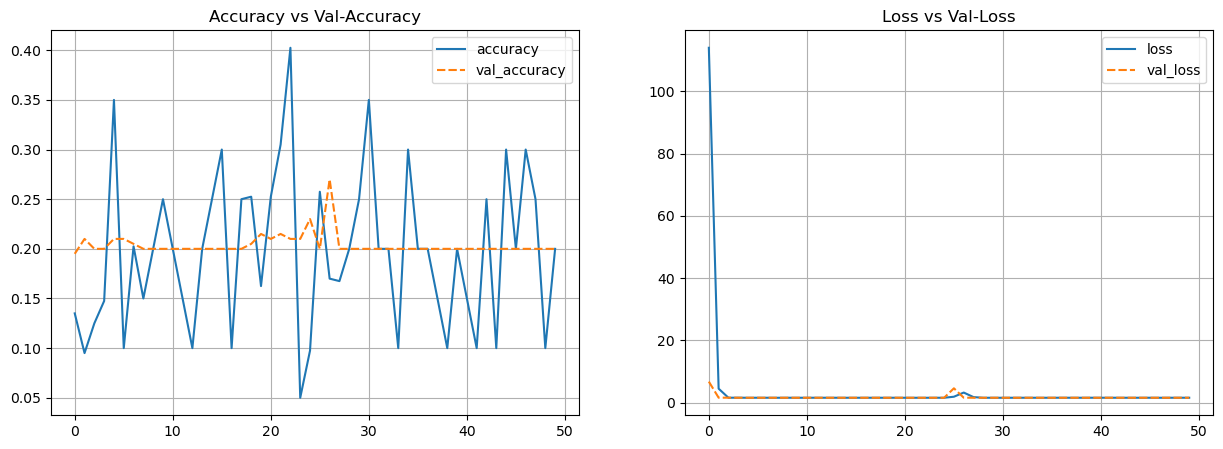

In [17]:
# save the plot training history into a dataframe
history_model_1 = pd.DataFrame(history_model_1.history)

plt.figure(figsize=(15,5))
# define a first subplot for accuracy and validation accuracy comparison
plt.subplot(1,2,1)
sns.lineplot(data=history_model_1[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

# define a second subplot for loss and validation loss comparison
plt.subplot(1,2,2)
sns.lineplot(data=history_model_1[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Description: The visualization of the first model's accuracy suggests a state of underfitting, as the maximum accuracy achieved during the training process is only 0.3. However, the loss versus the validation loss tends to decrease over time.

## F2. Tuned Artificial Neural Network Modeling  
  
To enhance the probability of achieving a better model algorithm, we need to further configure the model by implementing some optimizer and technical improvements. Our model enhancement will involve adjusting parameters and optimizing the optimizer, as listed below:
- Convolve the input data into a 3x3 matrix with a kernel weight of 2 and ReLU activation function.
- Pool the convoluted input using the MaxPooling2D method while maintaining the original resolution with padding and striding set to 1x1.
- Perform another convolution on the output image with a weight of 4 using the same matrix shape and activation function.
- Pool the convoluted output using the same method as before.
- Perform the final convolution with the same method but with a weight of 8.
- Convert the convoluted image into a vector using an averaging method (GlobalAveragePooling2D) and feed it into the input layer.
- Implement the same layering as in a regular ANN.
- Implement early-stopping and learning-rate scheduler callbacks
- Change the optimizer to AdaMax.

### F2-A. Model Training

In [18]:
# Define a clearing session step
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)
# This will reset the training cache so every re-training produces fresh algorithm

# Define our improved sequential learning flow
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Conv2D(2, (3, 3), activation='relu', input_shape=(400,400,3)))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='same'))
model_2.add(tf.keras.layers.Conv2D(4, (3, 3), activation='relu'))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='same'))
model_2.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu'))
model_2.add(tf.keras.layers.GlobalAveragePooling2D())
model_2.add(Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_2.add(Dense(20, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_2.add(Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_2.add(Dense(10, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_2.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_2.add(Dense(5, activation='softmax', kernel_initializer=tf.keras.initializers.HeNormal(seed)))

# create a callback function
eStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
lrScheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)
# this callback collections will stop the model to prevent further underfitting condition and to reduce the learning rate upon learning stagnation

# compile the model using categorical cross-entropy loss with AdamMax optimizer
model_2.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
model_2.summary()
# the model will evaluate its accuracy metric

# save the model training result in history_model_2
history_model_2 = model_2.fit(train_data, epochs=50, steps_per_epoch=20, validation_data=valid_data, validation_steps=10, callbacks=[lrScheduler, eStopping])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 2)       56        
                                                                 
 max_pooling2d (MaxPooling2  (None, 398, 398, 2)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 396, 396, 4)       76        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 396, 396, 4)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 394, 394, 8)       296       
                                                                 
 global_average_pooling2d (  (None, 8)                 

Based on our configured model training, we have observed a little significant progress in the model's accuracy. It reached its highest accuracy of around 0.4 at its peak.

### F2-B. Model Evaluation

In [19]:
evalModel_2 = model_2.evaluate(train_data, batch_size=20)
dict(zip(model_2.metrics_names, evalModel_2))

485/485 [==============================] - 43s 88ms/step - loss: 1.6126 - accuracy: 0.2051


{'loss': 1.6125506162643433, 'accuracy': 0.20505154132843018}

Our second model suggest a prediction that approaches 0.201 rate of accuracy and of 1.6 loss rate in evaluating the train data batched by 20 images. This model is quite promising compared with the regular ANN model that has no improvement configuration.

In [20]:
evalModel_2 = model_2.evaluate(test_data, batch_size=20)
dict(zip(model_2.metrics_names, evalModel_2))

5/5 [==============================] - 0s 85ms/step - loss: 1.6159 - accuracy: 0.2100


{'loss': 1.6159178018569946, 'accuracy': 0.20999999344348907}

Description: Our model, utilizing a functional API, suggests a slight improvement compared to the regular/sequential data, although no detailed improvements are available. Evaluation of our model on the test dataset reveals an accuracy of approximately 0.20 with a loss of around 1.5, indicating a slight improvement over the first model.

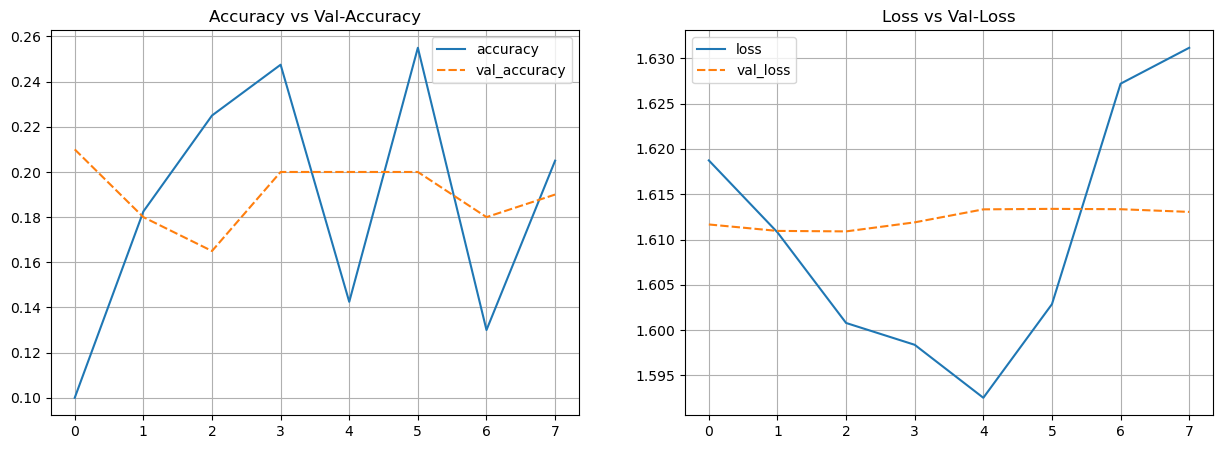

In [21]:
# Plot Training Results

history_model_2 = pd.DataFrame(history_model_2.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model_2[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model_2[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

The accuracy rate progression over epochs remains oscillating, while it may indicate that the validation accuracy is slightly higher. The validation loss tends to decrease over time. Hence, this model configuration is considered better compared to the previous one.

# G. Model Saving  
  
Based on the current state of model development, we can conclude that the model may indeed be generating an algorithm that tends to produce underfit results.

Therefore, we will save the best model achieved so far into a Keras file.

In [31]:
# save the model into a keras file named `cnn_model`
model_2.save('cnn_model.h5')

# H. Model Inference  
  
This section will perform a simple model inference using foreign/unseen data to predict the class to which any given image belongs. For better clarity in the documentation, we will conduct model inference in a separate notebook file named `P2G7_nicku_perdana_inf.ipynb`.

# I. Conclusion
  
- This model, however, still needs many improvements to make it closer to the best-fitted model by utilizing more complex and intensive training with a well-designed dataset and more supporting computational resources.
- Upon reviewing the data, we notice some inconsistencies in the dataset collection. There is no standardization of data format, no rule unifying the shape and features of images, and no consideration for out-of-context elements within images (for example, an image classified as a 'banana' while also featuring a banana seller). We need to be more selective in our data collection process.
- Once we have properly curated our final and more uniform dataset, we can undertake more complex feature engineering tasks like data augmentation. Data augmentation is useful for providing the computer with a diverse set of training examples under various artificial image conditions while maintaining relatively consistent image characteristics. The reason I did not perform data augmentation is that the existing data variation is already considerable, exceeding my expectations, and therefore, I deemed further augmentation unnecessary.
- With a selective dataset and enhanced engineering efforts, we anticipate achieving significant, stable, and steadily increasing performance. Our choice of featuring an accuracy metric allows us to create a model that can predict while also minimizing the risk of misclassification. Accuracy is a metric to identify how accurate our predictions are with our model.